In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [82]:
df = pd.read_csv("../../data/external/senegal_weather_spei_1970_2020_025x025_v3.csv")

In [83]:
df.head(10)

,Unnamed: 0,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon
0,0,1970,1,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,...,25.345588,26.505000,29.255000,6,0.061824,NaN,NaN,NaN,NaN,NaN
1,1,1970,2,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,...,27.025714,26.521071,28.273929,6,-0.595051,NaN,NaN,NaN,NaN,NaN
2,2,1970,3,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,...,28.153226,28.197419,28.140645,6,0.080660,-0.224773,NaN,NaN,NaN,NaN
3,3,1970,4,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,...,30.357333,29.361000,28.247000,6,-1.718752,-0.965743,NaN,NaN,NaN,NaN
4,4,1970,5,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,...,30.270000,30.381613,28.838387,6,0.549326,-0.317980,NaN,NaN,NaN,NaN
5,5,1970,6,16.692072,-16.043186,0.00,28.329333,0.533333,33.843667,304.433333,...,31.444667,30.708000,29.289333,6,-0.450982,-0.607012,-0.436167,NaN,NaN,NaN
6,6,1970,7,16.692072,-16.043186,0.07,27.577097,0.687419,36.299677,284.322581,...,31.650645,31.223226,29.844516,6,0.919182,0.430616,-0.297469,NaN,NaN,NaN
7,7,1970,8,16.692072,-16.043186,1.20,29.062903,0.694516,39.248710,261.451613,...,32.669355,32.112258,30.380968,6,-0.401754,-0.005865,-0.184147,NaN,NaN,NaN
8,8,1970,9,16.692072,-16.043186,2.48,28.719667,0.690000,38.435000,266.666667,...,31.857667,32.063667,30.920333,6,1.452527,1.017555,-0.042260,NaN,NaN,NaN
9,9,1970,10,16.692072,-16.043186,0.19,29.602258,0.471613,34.716774,263.193548,...,32.705484,32.183226,31.147742,6,0.270273,0.629732,0.664992,NaN,NaN,NaN


In [84]:
df = df.reset_index(drop=True)

In [85]:
df_x = df.drop_duplicates(['gpslat', 'gpslon'])

In [86]:
df_x = df_x.reset_index(drop=True)

In [87]:
df_x

,Unnamed: 0,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon
0,0,1970,1,16.692072,-16.043186,0.0,23.194412,0.333824,22.962059,231.441176,...,25.345588,26.505000,29.255000,6,0.061824,NaN,NaN,NaN,NaN,NaN
1,613,1970,1,16.692072,-15.793186,0.0,23.712941,0.293824,23.047941,231.852941,...,25.861176,27.041471,29.891765,7,-0.225734,NaN,NaN,NaN,NaN,NaN
2,1226,1970,1,16.692072,-15.543186,0.0,24.067059,0.278824,23.266176,230.970588,...,26.373235,27.570000,30.562353,8,-0.392136,NaN,NaN,NaN,NaN,NaN
3,1839,1970,1,16.692072,-15.293186,0.0,24.231176,0.267941,23.312647,231.000000,...,26.498529,27.727059,30.830000,9,-0.469937,NaN,NaN,NaN,NaN,NaN
4,2452,1970,1,16.692072,-15.043186,0.0,24.411765,0.260882,23.418824,230.764706,...,26.698235,27.955882,31.121765,10,-0.525643,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,197386,1970,1,12.442072,-12.543186,0.0,26.250882,0.295588,26.381765,240.529412,...,27.133529,27.077353,26.779706,445,0.025966,NaN,NaN,NaN,NaN,NaN
323,197999,1970,1,12.442072,-12.293186,0.0,26.272059,0.287059,26.242647,240.882353,...,26.844118,26.866176,26.679118,446,-0.155701,NaN,NaN,NaN,NaN,NaN
324,198612,1970,1,12.442072,-12.043186,0.0,26.248824,0.280294,26.091471,241.294118,...,26.931471,26.932941,26.742647,447,-0.216572,NaN,NaN,NaN,NaN,NaN
325,199225,1970,1,12.442072,-11.793186,0.0,26.044118,0.272353,25.631471,241.500000,...,27.202353,27.126471,26.792647,448,-0.388466,NaN,NaN,NaN,NaN,NaN


In [88]:
df

,Unnamed: 0,year,month,gpslat,gpslon,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,...,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon,spei_3mon,spei_6mon,spei_12mon,spei_24mon,spei_48mon
0,0,1970,1,16.692072,-16.043186,0.00,23.194412,0.333824,22.962059,231.441176,...,25.345588,26.505000,29.255000,6,0.061824,NaN,NaN,NaN,NaN,NaN
1,1,1970,2,16.692072,-16.043186,0.00,25.701786,0.325000,25.835714,239.714286,...,27.025714,26.521071,28.273929,6,-0.595051,NaN,NaN,NaN,NaN,NaN
2,2,1970,3,16.692072,-16.043186,0.00,25.656452,0.401613,27.049355,288.419355,...,28.153226,28.197419,28.140645,6,0.080660,-0.224773,NaN,NaN,NaN,NaN
3,3,1970,4,16.692072,-16.043186,0.03,28.186000,0.319333,28.936333,317.600000,...,30.357333,29.361000,28.247000,6,-1.718752,-0.965743,NaN,NaN,NaN,NaN
4,4,1970,5,16.692072,-16.043186,0.00,26.190968,0.521935,30.060968,315.419355,...,30.270000,30.381613,28.838387,6,0.549326,-0.317980,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200119,200445,2020,8,12.442072,-11.543186,15.11,26.544194,0.853871,37.702903,183.032258,...,27.200645,28.180645,30.475806,449,-1.130251,-0.892760,-1.453274,-1.674648,-1.692690,-1.749047
200120,200446,2020,9,12.442072,-11.543186,11.34,26.357667,0.847000,37.193000,201.800000,...,26.918333,27.481667,29.052333,449,-0.386674,-0.794975,-1.323167,-1.636814,-1.709556,-1.722378
200121,200447,2020,10,12.442072,-11.543186,4.70,27.429677,0.747419,37.265161,247.612903,...,27.354516,27.666452,28.319677,449,-0.677906,-0.829825,-1.132557,-1.704823,-1.698853,-1.691980
200122,200448,2020,11,12.442072,-11.543186,0.01,27.442667,0.437667,30.932333,246.766667,...,27.891000,27.932000,28.086000,449,-0.820374,-0.737940,-0.882240,-1.644929,-1.682814,-1.683102


In [89]:
lat_long_unique = df_x[["gpslat", "gpslon"]]
lat_long_unique

,gpslat,gpslon
0,16.692072,-16.043186
1,16.692072,-15.793186
2,16.692072,-15.543186
3,16.692072,-15.293186
4,16.692072,-15.043186
...,...,...
322,12.442072,-12.543186
323,12.442072,-12.293186
324,12.442072,-12.043186
325,12.442072,-11.793186


### https://www.uncclearn.org/wp-content/uploads/library/wfp10.pdf

In [4]:
df_1month = df.iloc[:, 5:18]

In [5]:
df_1month = df_1month.dropna()

In [6]:
df_1month

,total_precipitation,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,id,spei_1mon
0,0.00,23.194412,0.333824,22.962059,231.441176,321.000000,173.120000,24.512353,25.345588,26.505000,29.255000,6,0.061824
1,0.00,25.701786,0.325000,25.835714,239.714286,349.035714,168.727857,27.333571,27.025714,26.521071,28.273929,6,-0.595051
2,0.00,25.656452,0.401613,27.049355,288.419355,343.258065,216.963226,28.188387,28.153226,28.197419,28.140645,6,0.080660
3,0.03,28.186000,0.319333,28.936333,317.600000,345.333333,247.384667,30.874333,30.357333,29.361000,28.247000,6,-1.718752
4,0.00,26.190968,0.521935,30.060968,315.419355,362.225806,246.730968,30.200000,30.270000,30.381613,28.838387,6,0.549326
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200119,15.11,26.544194,0.853871,37.702903,183.032258,418.903226,98.931613,27.547097,27.200645,28.180645,30.475806,449,-1.130251
200120,11.34,26.357667,0.847000,37.193000,201.800000,415.166667,128.167000,27.230667,26.918333,27.481667,29.052333,449,-0.386674
200121,4.70,27.429677,0.747419,37.265161,247.612903,394.677419,188.425161,27.865806,27.354516,27.666452,28.319677,449,-0.677906
200122,0.01,27.442667,0.437667,30.932333,246.766667,363.300000,196.062000,28.198667,27.891000,27.932000,28.086000,449,-0.820374


In [7]:
X = df_1month.iloc[:,:11]
y = df_1month.iloc[:,12]

In [59]:
len(X)

200078

In [60]:
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [114]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 15)

In [115]:
xg_reg.fit(X_train, y_train)

[19:33:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=15, n_jobs=12, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [116]:
preds = xg_reg.predict(X_test)

In [117]:
rmse = np.sqrt(mean_squared_error(y_test.to_numpy(), preds))
print("RMSE: %f" % (rmse))

RMSE: 0.920895


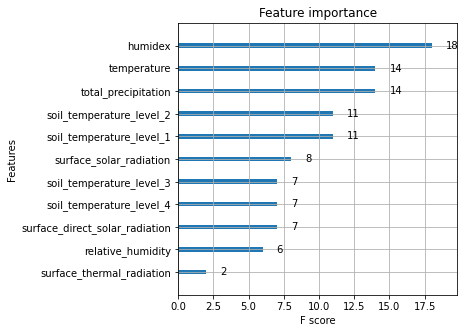

In [118]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [119]:
rmspe = np.sqrt(np.mean(np.square(((y_test - preds) / y_test)), axis=0))

In [120]:
rmspe

33.19214397382639

In [121]:
preds

array([ 0.05226314,  0.1710973 ,  0.08959645, ...,  0.00695832,
       -0.21866454, -0.11751895], dtype=float32)

In [122]:
y_test.to_numpy()

array([ 1.1753676 ,  0.23013217, -0.27167479, ...,  0.14941008,
       -0.7681881 , -0.71147581])

In [143]:
cols =['temperature', 
              'relative_humidity', 
              'humidex', 
              'surface_solar_radiation', 
              'surface_thermal_radiation', 
              'surface_direct_solar_radiation', 
              'wind_speed', 
             'wind_direction', 
              'soil_temperature_level_1', 
              'soil_temperature_level_2', 
              'soil_temperature_level_3', 
              'soil_temperature_level_4', 
              'total_precipitation',
              'year',
            'month',
             'week',
              'day',
              'daysOfWeek',
              'gpslat',
               'gpslon' ] 

In [144]:
grid_daily_data = pd.read_csv("../../data/external/senegal_weather_1970_2020_low_res_327_points_data.csv", names=cols)
grid_monthly_spei = pd.read_csv("../../data/external/senegal_weather_spei_1970_2020_025x025_v3.csv")

In [145]:
grid_daily_data

,temperature,relative_humidity,humidex,surface_solar_radiation,surface_thermal_radiation,surface_direct_solar_radiation,wind_speed,wind_direction,soil_temperature_level_1,soil_temperature_level_2,soil_temperature_level_3,soil_temperature_level_4,total_precipitation,year,month,week,day,daysOfWeek,gpslat,gpslon
0,27.42,0.31,28.24,212,363,151.01,2.28,17.70,28.33,27.80,27.26,29.57,0.0,1970,1,1,1,4,16.692072,-16.043186
1,27.92,0.28,28.25,195,374,115.15,2.79,45.00,28.92,28.37,27.43,29.54,0.0,1970,1,1,2,5,16.692072,-16.043186
2,26.82,0.40,29.16,190,380,105.09,4.57,350.42,28.74,28.74,27.64,29.52,0.0,1970,1,1,3,6,16.692072,-16.043186
3,23.37,0.67,28.55,192,370,108.01,5.59,353.32,26.66,28.07,27.80,29.50,0.0,1970,1,1,4,7,16.692072,-16.043186
4,23.44,0.61,27.75,209,361,149.41,5.18,359.62,25.70,27.09,27.81,29.48,0.0,1970,1,2,5,1,16.692072,-16.043186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18641,26.38,0.09,22.58,245,326,NaN,1.27,76.53,27.47,28.11,27.97,27.68,0.0,2021,1,2,14,4,12.442072,-11.543186
18642,26.11,0.10,22.36,245,326,NaN,1.35,92.78,27.25,28.04,27.97,27.69,0.0,2021,1,2,15,5,12.442072,-11.543186
18643,25.81,0.10,22.06,271,328,NaN,1.79,88.40,26.64,27.97,27.96,27.69,0.0,2021,1,2,16,6,12.442072,-11.543186
18644,25.91,0.10,22.16,244,328,NaN,1.28,90.33,26.72,27.88,27.95,27.70,0.0,2021,1,2,17,7,12.442072,-11.543186
